# Використання методу К-середніх для кластерізації даних

___

При використанні алгоритму К-середніх за звичай використовуються датасети без міток. Однак у цьому завданні буде використано датасет з мітками, щоб отримати уявлення про те, наскільки добре працює алгоритм.
___

## Датасет

У цьому завданні буде викиростано датасет з інформацією по університети, що має 777 блаків даних з наступними 18 зміними:
* Private - характеристика, що має значення "No" або "Yes" та показує приватний чи публіний університет
* Apps - кількість отрианих заяв на вступ
* Accept - кількість прийнятих заяв на вступ
* Enroll - кількість нових студентів
* Top10perc - відсоток нових студетів від топ 10% у школі
* Top25perc - відсоток нових студетів від топ 25% у школі
* F.Undergrad - Кількість студентів денної форми навчання
* P.Undergrad - Кількість студентів заочної форми навчання
* Outstate - Out-of-state tuition
* Room.Board - Вартість проживання та харчування
* Books - Орієнтовна вартість підручників
* Personal - Орієнтована сума особистих витрат
* PhD - відсоток викладачив зі ступенем Ph.D.
* Terminal - відсоток викладачив зі ступенем
* S.F.Ratio - співідночення кількості студентів до кількості викладачиі
* perc.alumni - відсоток випускників, які донатять
* Expend - Витрати на навчання на одного студента
* Grad.Rate - Graduation rate

## Імпорт бібліотек

** Іспортуйте необхідні бібліотеки. У разі відсутності, встановіть їх за допомогою  pip.**

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Зчитайте дані

** Прочитайте файл College_Data за допомогою метода read_csv. **

In [120]:
df = pd.read_csv('input/College_Data.csv',index_col=0)

** Перевірте зчитані дані**

In [121]:
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


** Перевірте структуру даних за допомогою методів info() та describe()**

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Private      777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: 

In [123]:
df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


## Аналіз даних


**Створіть діаграму розсіювання, що показує співвідношення Grad.Rate відносно параметра Room.Board.**

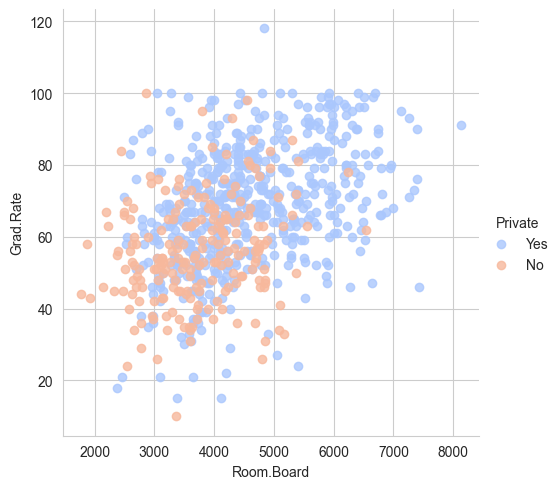

In [124]:
sns.set_style('whitegrid')
sns.lmplot(data=df, x='Room.Board',y='Grad.Rate', hue='Private',
           palette='coolwarm',aspect=1,fit_reg=False)

**Створіть діаграму розсіювання, що показує співвідношення F.Undergrad до Outstate**

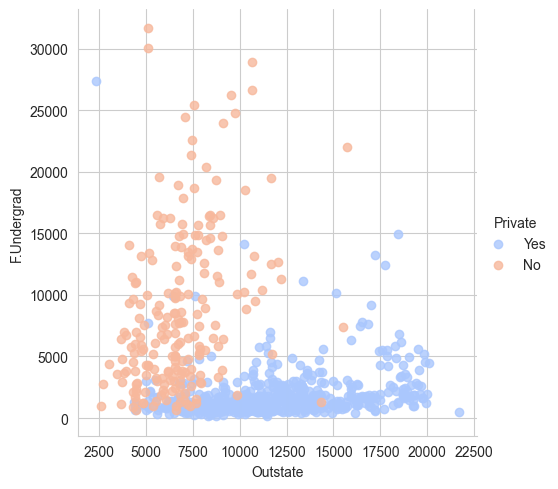

In [125]:
sns.set_style('whitegrid')
sns.lmplot(x='Outstate',y='F.Undergrad',data=df, hue='Private',
           palette='coolwarm',aspect=1,fit_reg=False)

**Створіть складену гістограму, що показує значення параметру Out of State Tuition відносно параметру Private**

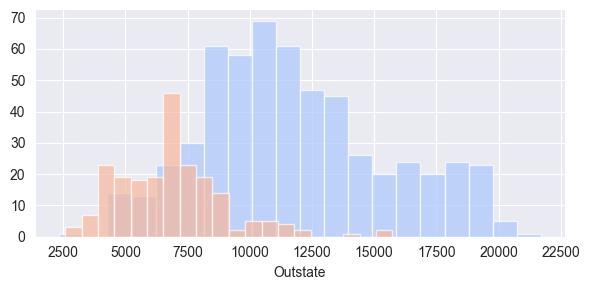

In [126]:
sns.set_style('darkgrid')
g = sns.FacetGrid(df,hue="Private",palette='coolwarm',aspect=2)
g = g.map(plt.hist,'Outstate',bins=20,alpha=0.7)

**Створіть схожу гістограму для параметру Grad.Rate**

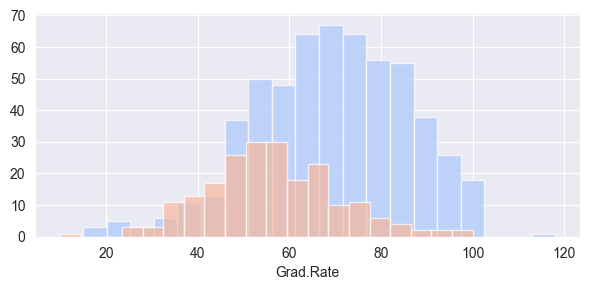

In [127]:
sns.set_style('darkgrid')
g = sns.FacetGrid(df,hue="Private",palette='coolwarm',aspect=2)
g = g.map(plt.hist,'Grad.Rate',bins=20,alpha=0.7)

## Створення кластеру К-середніх

** Імпортуйте модуль KMeans із бібліотеки SciKit Learn.**

In [128]:
from sklearn.cluster import KMeans

**Створіть екземпляр з 2 кластерами**

In [129]:
kmeans = KMeans(n_clusters=2)

**Задайте дані для моделі, окрім стовпчику Private.**

In [130]:
kmeans.fit(df.drop('Private',axis=1))

KMeans(n_clusters=2)

** Визначте центральні вектори кластерів**

In [131]:
kmeans.cluster_centers_

array([[1.99097222e+03, 1.34700585e+03, 5.01001462e+02, 2.66637427e+01,
        5.46023392e+01, 2.19326316e+03, 5.53080409e+02, 1.06887091e+04,
        4.37517398e+03, 5.44059942e+02, 1.26739474e+03, 7.10745614e+01,
        7.83391813e+01, 1.38330409e+01, 2.35716374e+01, 9.58258772e+03,
        6.59078947e+01],
       [1.04349247e+04, 6.95977419e+03, 2.83176344e+03, 3.41397849e+01,
        6.45806452e+01, 1.47810323e+04, 3.07806452e+03, 8.61637634e+03,
        4.22773118e+03, 5.88516129e+02, 1.87936559e+03, 8.43225806e+01,
        8.97311828e+01, 1.59774194e+01, 1.66559140e+01, 1.02307849e+04,
        6.21935484e+01]])

## Оцінка


** Створіть новий стовпець для df під назвою «cluster», який має значення 1 для приватного униіверситету та 0 для державного.**

In [132]:
def converter(cluster):
    if cluster=='Yes':
        return 1
    else:
        return 0

In [133]:
df['Cluster'] = df['Private'].apply(converter)

In [134]:
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1


** Створіть матрицю помилок та звіт про класифікацію**

In [135]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(df['Cluster'],kmeans.labels_))
print(classification_report(df['Cluster'],kmeans.labels_))

[[131  81]
 [553  12]]
              precision    recall  f1-score   support

           0       0.19      0.62      0.29       212
           1       0.13      0.02      0.04       565

    accuracy                           0.18       777
   macro avg       0.16      0.32      0.16       777
weighted avg       0.15      0.18      0.11       777



Точність (Accuracy): Точність визначає відсоток правильних прогнозів від загальної кількості прикладів

In [136]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(df['Cluster'], kmeans.labels_)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.18


Повнота (Recall): Повнота для класу 0

In [137]:
from sklearn.metrics import recall_score

recall = recall_score(df['Cluster'], kmeans.labels_, average=None)
print(f"Recall for class 0: {recall[0]:.2f}")

Recall for class 0: 0.62


Повнота для класу 1

In [138]:
print(f"Recall for class 1: {recall[1]:.2f}")

Recall for class 1: 0.02


Чіткість (Precision): Чіткість для класу 0

In [139]:
from sklearn.metrics import precision_score

precision = precision_score(df['Cluster'], kmeans.labels_, average=None)
print(f"Precision for class 0: {precision[0]:.2f}")

Precision for class 0: 0.19


Чіткість для класу 1

In [140]:
print(f"Precision for class 1: {precision[1]:.2f}")

Precision for class 1: 0.13


F1-метрика: Гармонійне середнє між точністю і повнотою

In [141]:
from sklearn.metrics import f1_score

f1 = f1_score(df['Cluster'], kmeans.labels_, average=None)
print(f"F1 score for class 0: {f1[0]:.2f}")
print(f"F1 score for class 1: {f1[1]:.2f}")


F1 score for class 0: 0.29
F1 score for class 1: 0.04


Візуалізація матриці помилок

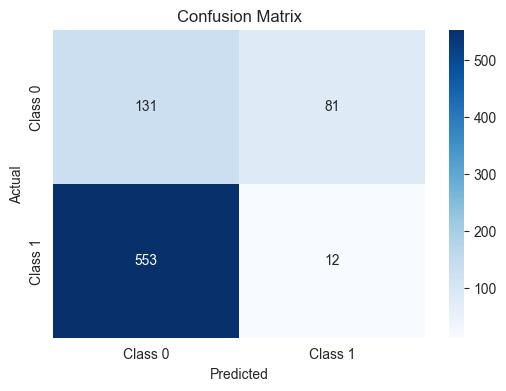

In [142]:
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(df['Cluster'], kmeans.labels_)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


Додатковий аналіз розподілу ознак

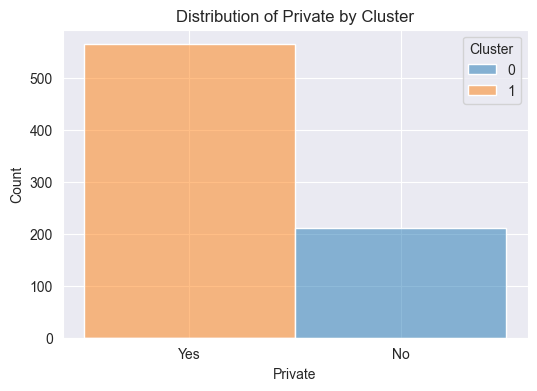

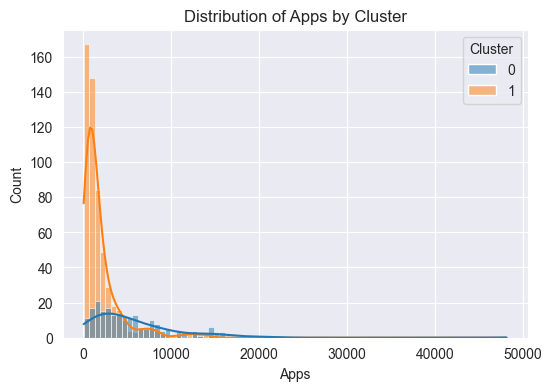

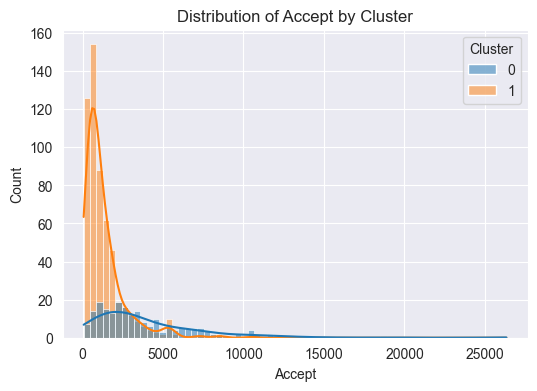

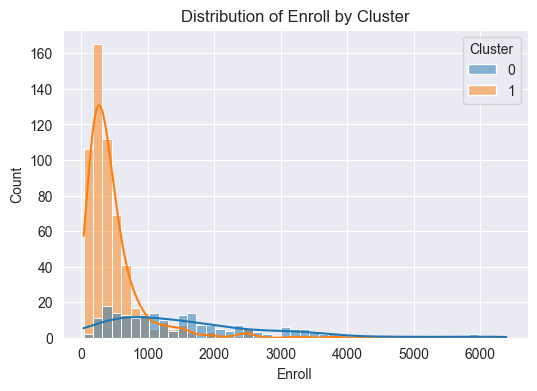

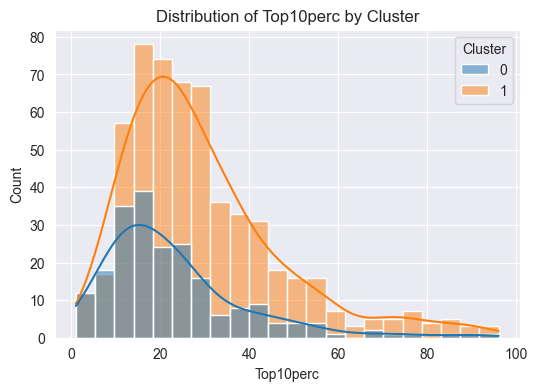

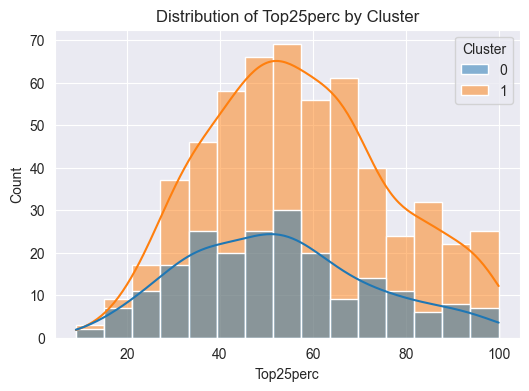

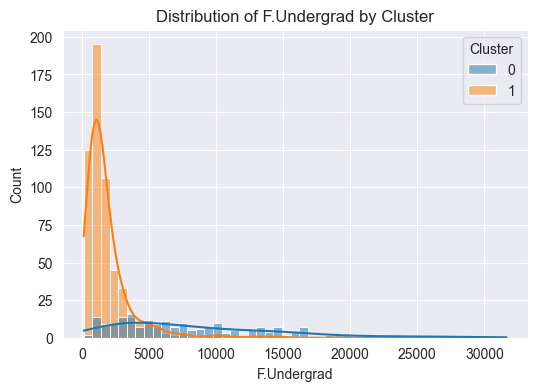

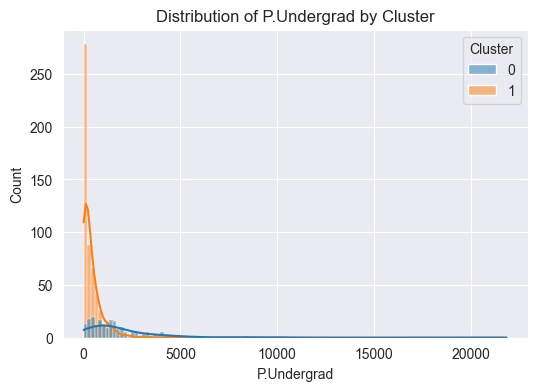

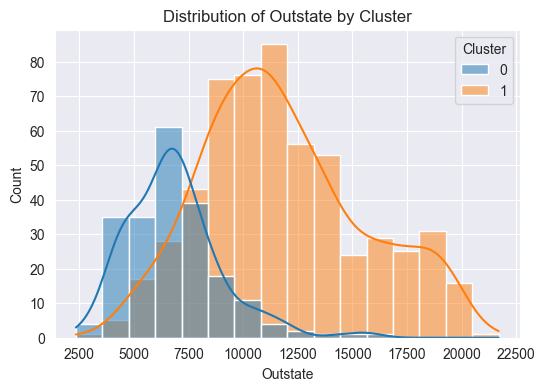

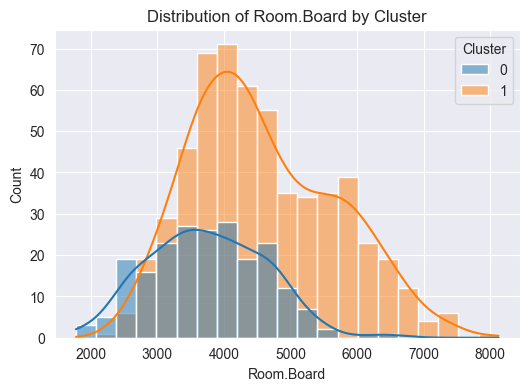

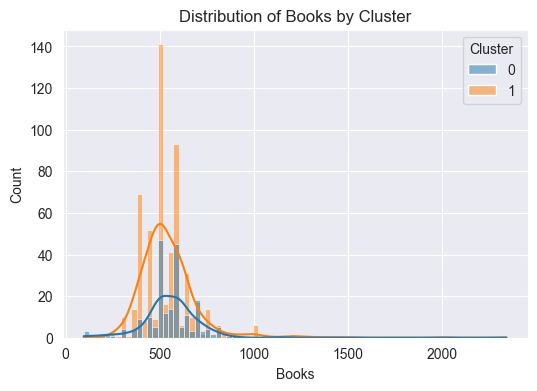

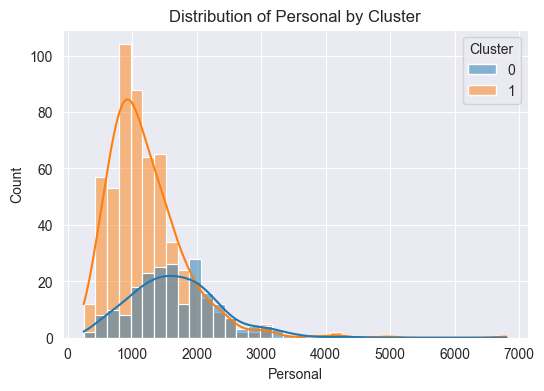

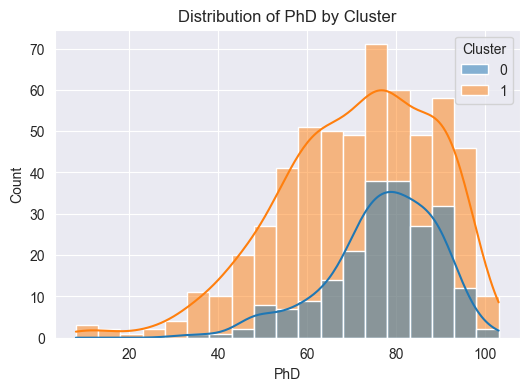

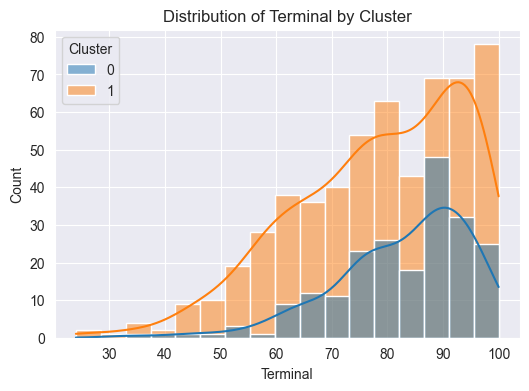

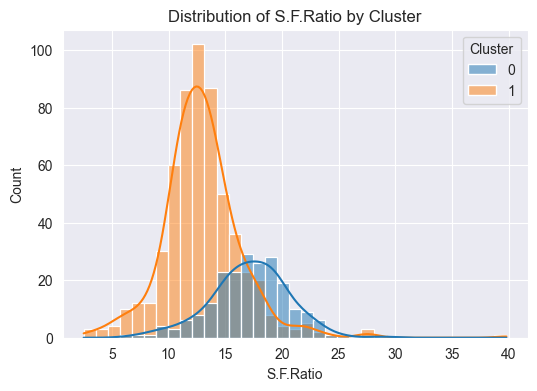

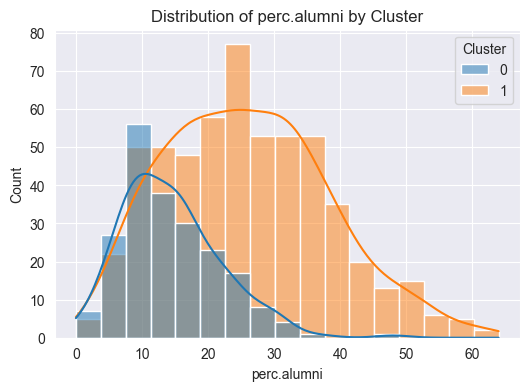

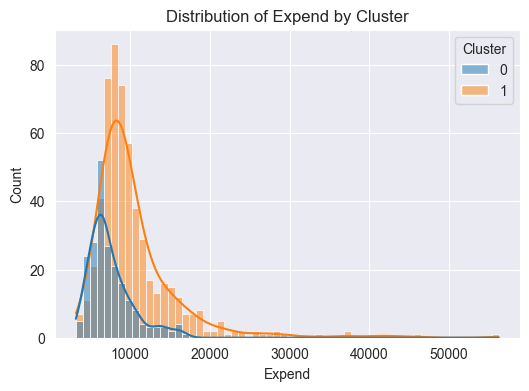

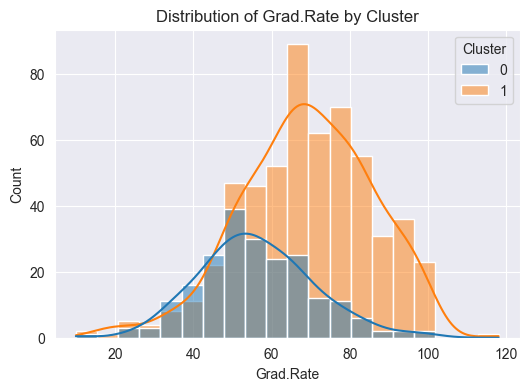

In [143]:
# Гістограми для кожної ознаки
for col in df.columns[:-1]:  # Виключаючи цільову колонку
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=col, hue='Cluster', kde=True, palette="tab10")
    plt.title(f"Distribution of {col} by Cluster")
    plt.show()
